In [1]:
import json
import re
import pandas as pd


In [2]:

nd = pd.read_csv('tweets-scrapper.csv')

In [3]:
nd

date  \
0     2020-05-11T15:30:41.000Z   
1     2020-05-13T13:28:39.000Z   
2     2020-01-31T12:09:44.000Z   
3     2019-12-12T21:54:40.000Z   
4     2020-06-30T20:22:53.000Z   
...                        ...   
2062  2019-11-01T16:49:30.000Z   
2063  2019-11-01T17:09:24.000Z   
2064  2019-11-01T16:35:18.000Z   
2065  2019-11-01T16:55:55.000Z   
2066  2019-11-01T16:26:51.000Z   

                                                message             statusId  \
0     Gerade was die #baseballschlägerjahre angeht, ...  1259868539047067651   
1     Im Ernst: Die Stadt hat seit den 90ern ein Pro...  1260562601974661122   
2     Krass alter. tut mir leid für dich und aber no...  1223216795529764869   
3     A Lot Of Trigger \n#baseballschlaegerjahre \n#...  1205244603496054787   
4     Die #baseballschlaegerjahre  sind völlig an di...  1278061468093755392   
...                                                 ...                  ...   
2062  Jahr 2001 in Nordthüringen: Vor der Dorfdisco ...  1190309901286989824   
2063  #baseballschlaegerjahre\nAls man noch eine fri...  1190314911789932544   
2064  #baseballschlaegerjahre Bin in einer Kleinstad...  1190306328398438400   
2065  #Baseballschlaegerjahre sind wenn man von Nazi...  1190311516484112384   
2066  #baseballschlaegerjahre waren auch noch die 00...  1190304203152994304   

             userName  
0      JuleSt76829358  
1         carolinhinz  
2     Stjepan_ivanski  
3          CRASSOWSKI  
4             TripsEF  
...               ...  
2062     TamerTransit  
2063   Carl_____Smith  
2064    CptParrothead  
2065       JZapatista  
2066    bartimaeus161  

[2067 rows x 4 columns]

In [4]:
dlt = nd['message']

# Remove URLs

In [5]:
dlt_clean = [re.sub(r'^.*https?:\/\/.*[\r\n]*', '', di, flags=re.MULTILINE) for di in dlt]

In [10]:
dlt_clean = set(dlt_clean)

# Remove empty tweets

In [11]:
dlt_clean = list(filter(lambda t: t != '', dlt_clean))

In [12]:
len(dlt_clean)

1489

In [13]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from spacy.lang.de import stop_words

# Creating a vectorizer
vectorizer = TfidfVectorizer(min_df=0, max_df=0.9, stop_words=stop_words.STOP_WORDS, lowercase=True, token_pattern=r'\b[^\d\W][^\d\W]+\b')
data_vectorized = vectorizer.fit_transform(dlt_clean)


In [14]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print(' '.join([vectorizer.get_feature_names()[i]
                        for i in topic.argsort()[:-top_n - 1:-1]]))
        print ('\n')

In [15]:
NUM_TOPICS = 6
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


/home/aivuk/.virtualenvs/twitter/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


# Show important words for topics using LDA method

In [16]:
selected_topics(lda, vectorizer)

Topic 0:
baseballschlaegerjahre baseballschlägerjahre nazis gewalt christianbangel mal osten angst polizei neonazis


Topic 1:
baseballschlägerjahre baseballschlaegerjahre hashtag rechts berichte politik silvio ähnlich migranten meier


Topic 2:
baseballschlaegerjahre baseballschlägerjahre deutschland matthias_quent veranstaltung problem gerufen cops siehe eindeutiger


Topic 3:
baseballschlaegerjahre baseballschlägerjahre davidbegrich text nonazis bitte lesen neonazis richtigen berliner


Topic 4:
baseballschlaegerjahre merz baseballschlägerjahre hitler buch dorfkinder drohungen aß danke schnapskirschen


Topic 5:
baseballschlaegerjahre baseballschlägerjahre nazis geschichte mal antifa jugendlichen täter west gewalt




# Show important words for topics using NMF method

In [17]:
selected_topics(nmf, vectorizer)

Topic 0:
baseballschlaegerjahre lesen bitte mal geschichte neonazis göttingen osten einfach erinnern


Topic 1:
baseballschlägerjahre osten neonazis ostdeutschland afd ddr westen vorhang dorfkinder erwachsenen


Topic 2:
nazis angst polizei westen gejagt leute neo akzeptieren menschen magdeburg


Topic 3:
gewalt kontinuitäten menschen teilen online seeroiberjenny davidbegrich leipzig opfer veranstaltung


Topic 4:
antifa erinnerungen besseren meinungsfreiheit medien organisationen belehren müssten bedrohen vorhang


Topic 5:
christianbangel hashtag mal danke erfahrungen geschichten zeigt menschen diezeit autor




# Show important words for topics using LSI method

In [18]:
selected_topics(lsi, vectorizer)

Topic 0:
baseballschlaegerjahre baseballschlägerjahre nazis gewalt hashtag christianbangel mal neonazis antifa danke


Topic 1:
baseballschlägerjahre hashtag vorhang osten neonazis antifa meinungsfreiheit ostdeutschland gewalt alltag


Topic 2:
nazis antifa angst polizei westen meinungsfreiheit neo gejagt akzeptieren magdeburg


Topic 3:
gewalt kontinuitäten antifa menschen online seeroiberjenny ostdeutschland davidbegrich veranstaltung kraskem


Topic 4:
antifa erinnerungen besseren medien belehren organisationen müssten meinungsfreiheit bedrohen baseballschlaegerjahre


Topic 5:
christianbangel antifa danke erfahrungen erinnerungen meinungsfreiheit menschen besseren organisationen belehren




In [19]:
# Function to group tweets by topic
def get_topics(method, data, tweets):
    topics = []
    methodt = method.transform(data)
    for n in range(methodt.shape[0]):
        topics += [methodt[n].argmax()]
        
    tweet_topics = {}
    for i,t in enumerate(tweets):
        if topics[i] not in tweet_topics:
            tweet_topics[topics[i]] = []
        tweet_topics[topics[i]] += [t]
    return tweet_topics

In [20]:
# Group tweets for each topic
lda_topics = get_topics(lda, data_vectorized, dlt_clean)
nmf_topics = get_topics(nmf, data_vectorized, dlt_clean)
lsi_topics = get_topics(lsi, data_vectorized, dlt_clean)

In [21]:
# Number tweets per topic
print("LDA Topics\n")
for t in lda_topics.keys():
    print("Topic {}: {}".format(t, len(lda_topics[t])))


LDA Topics

Topic 3: 159
Topic 5: 201
Topic 0: 792
Topic 1: 108
Topic 2: 119
Topic 4: 110


In [22]:
# Number tweets per topic
print("NMF Topics\n")
for t in nmf_topics.keys():
    print("Topic {}: {}".format(t, len(nmf_topics[t])))


NMF Topics

Topic 0: 619
Topic 4: 61
Topic 2: 230
Topic 1: 320
Topic 5: 133
Topic 3: 126


In [23]:
# Number tweets per topic
print("LSI Topics\n")
for t in lsi_topics.keys():
    print("Topic {}: {}".format(t, len(lsi_topics[t])))


LSI Topics

Topic 0: 861
Topic 1: 296
Topic 2: 143
Topic 5: 65
Topic 4: 28
Topic 3: 96


In [25]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [26]:
def create_wordcloud(text, filename): 
    stopwords = set(stop_words.STOP_WORDS)
    # create wordcloud object
    wc = WordCloud(background_color="black",
                    max_words=200, 
                    width=600,
                    height=600,
                    stopwords=stopwords)
    wc.generate(text)
    # save wordcloud
    wc.to_file(filename)

In [27]:
create_wordcloud(' '.join(dlt_clean), 'all_tweets.png')

In [28]:
from IPython.display import Image

# Tag cloud for all tweets

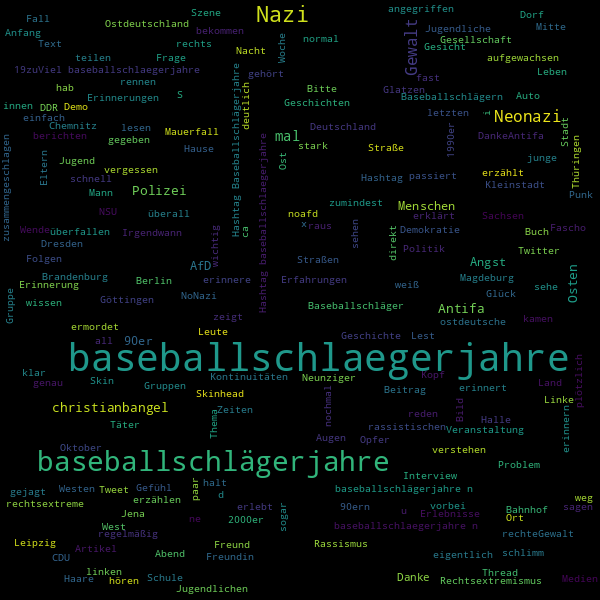

In [29]:
Image('all_tweets.png')

In [30]:
for t in lda_topics.keys():
    tweet_text = ' '.join(lda_topics[t])
    create_wordcloud(tweet_text, 'lda-topic-{}.png'.format(t))
    Image('lda-topic-{}.png'.format(t))

# Tag clouds for topics with LDA method

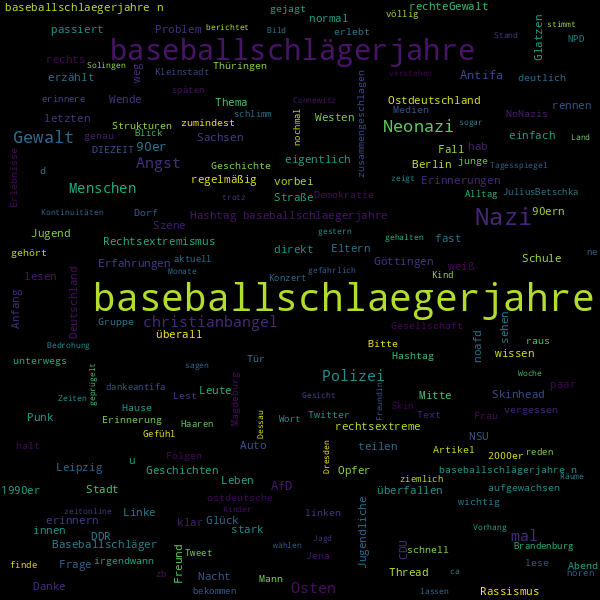

In [31]:
Image('lda-topic-0.png')

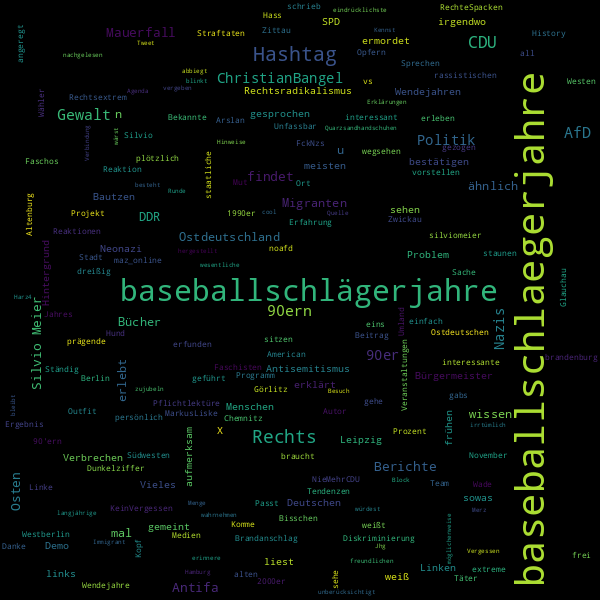

In [32]:
Image('lda-topic-1.png')

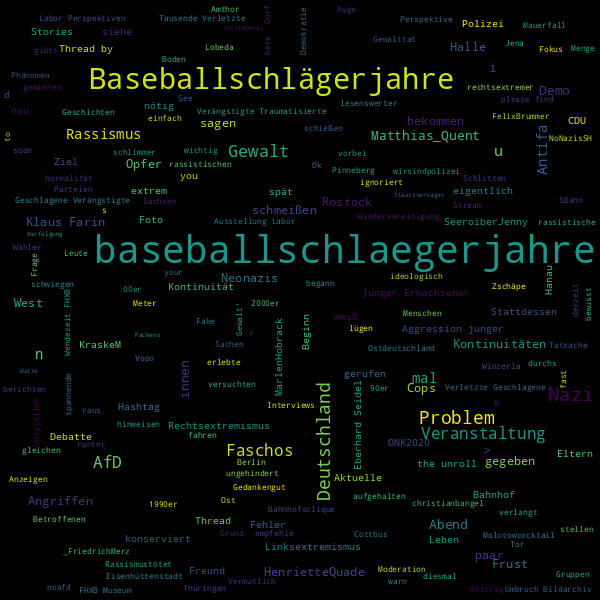

In [33]:
Image('lda-topic-2.png')

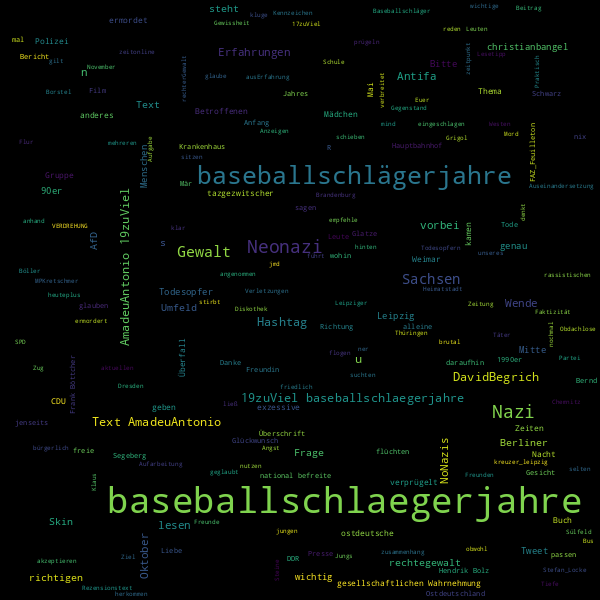

In [34]:
Image('lda-topic-3.png')

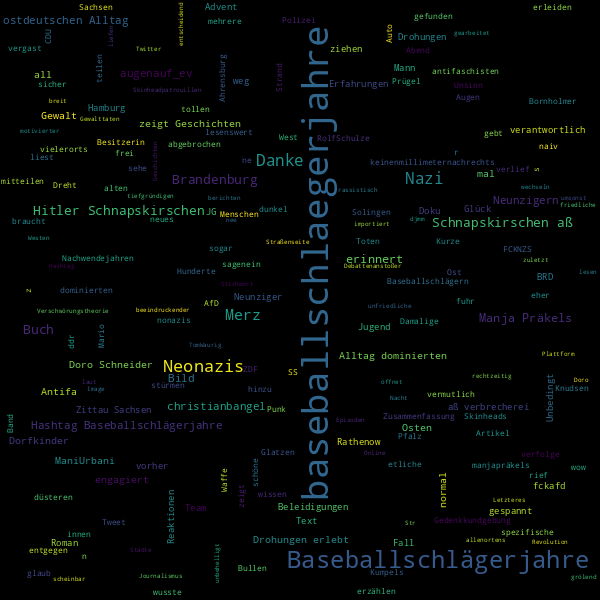

In [35]:
Image('lda-topic-4.png')

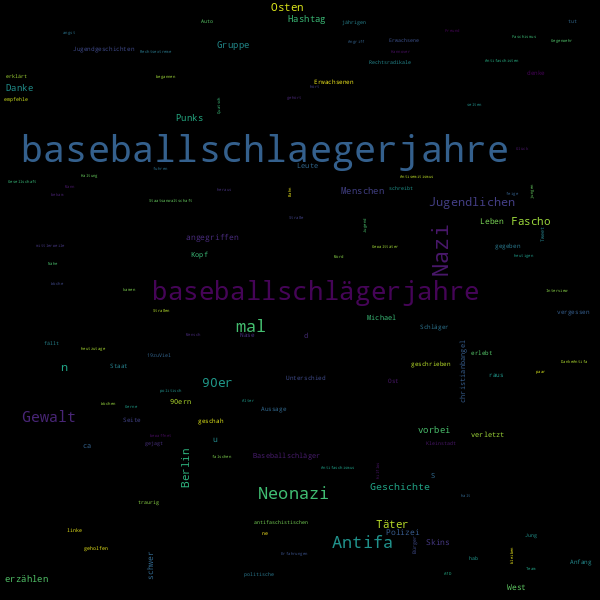

In [36]:
Image('lda-topic-5.png')

# Tag cloud for topics for LSI method

In [37]:
for t in lsi_topics.keys():
    tweet_text = ' '.join(lda_topics[t])
    create_wordcloud(tweet_text, 'lsi-topic-{}.png'.format(t))
    Image('lsi-topic-{}.png'.format(t))

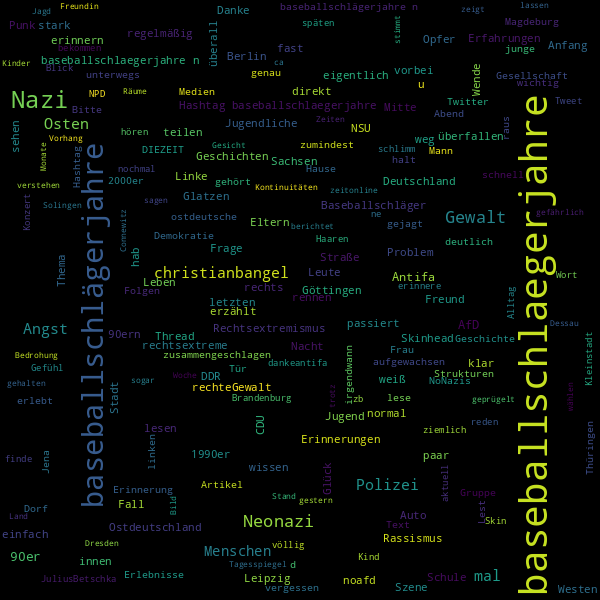

In [38]:
Image('lsi-topic-0.png')

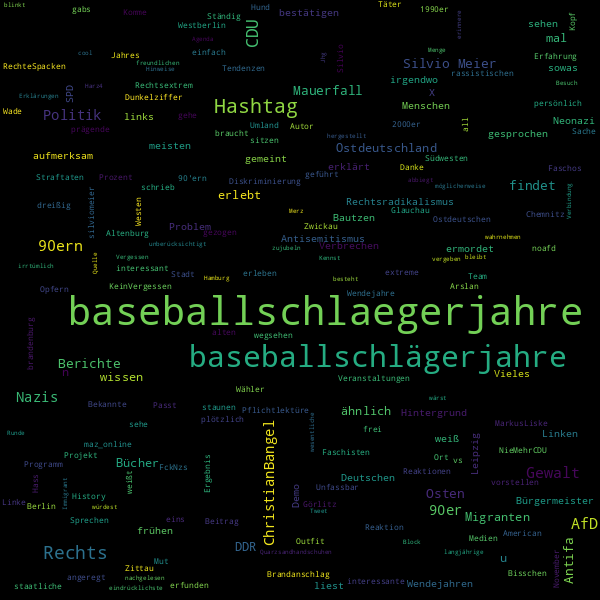

In [39]:
Image('lsi-topic-1.png')

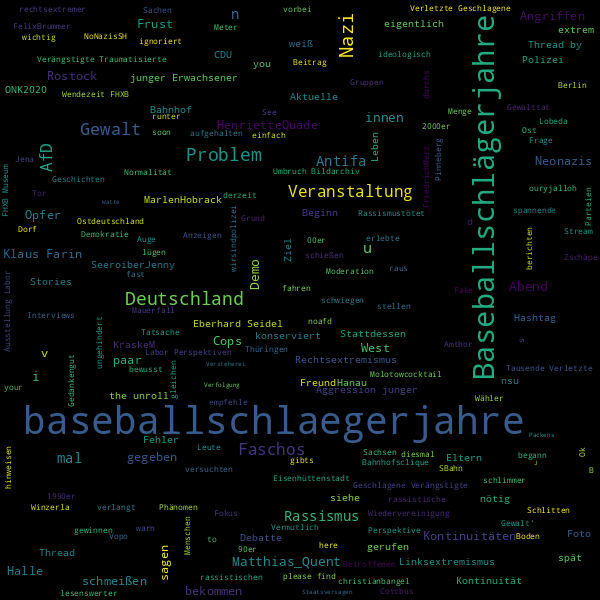

In [40]:
Image('lsi-topic-2.png')

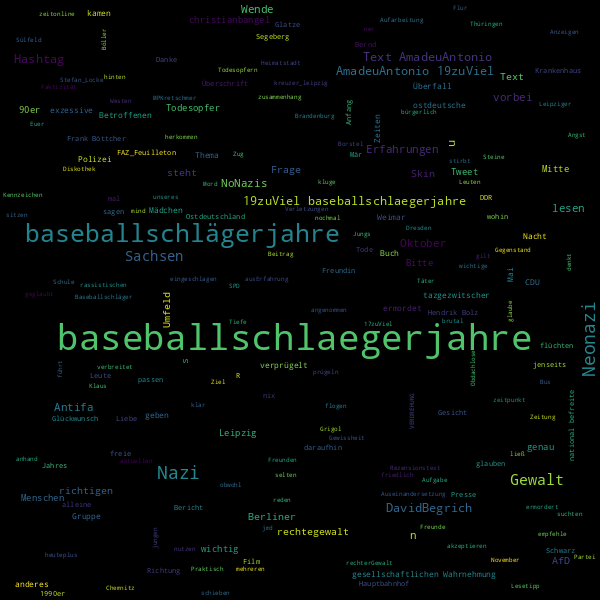

In [41]:
Image('lsi-topic-3.png')

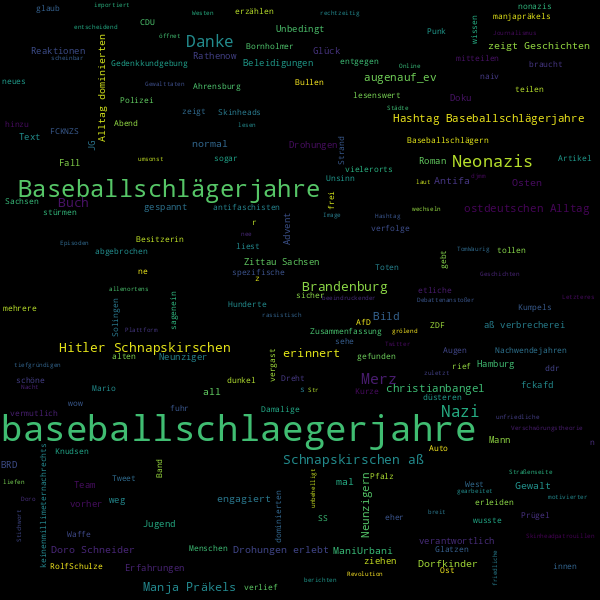

In [42]:
Image('lsi-topic-4.png')

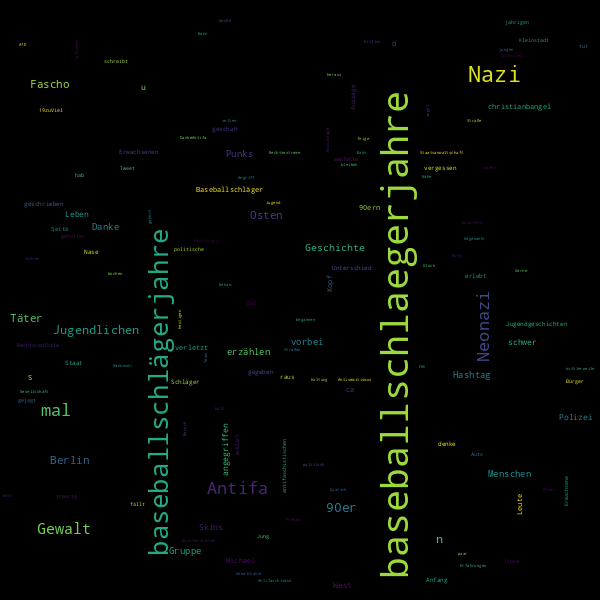

In [43]:
Image('lsi-topic-5.png')

In [44]:
for t in lsi_topics.keys():
    tweet_text = ' '.join(lda_topics[t])
    create_wordcloud(tweet_text, 'nmf-topic-{}.png'.format(t))


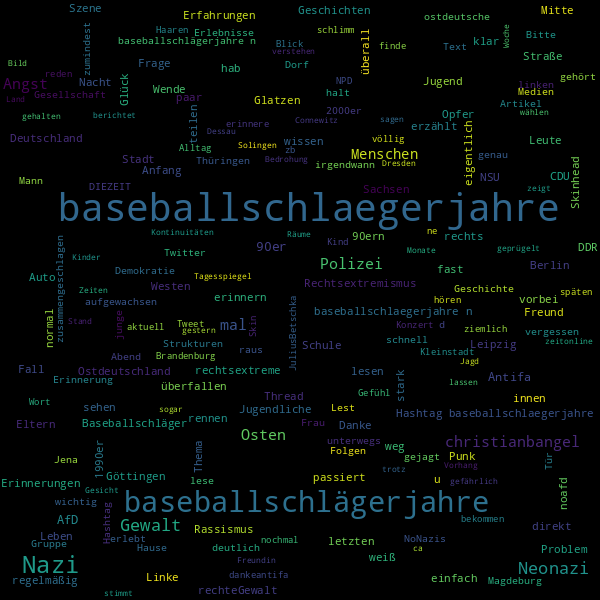

In [45]:
    Image('nmf-topic-0.png'.format(t))

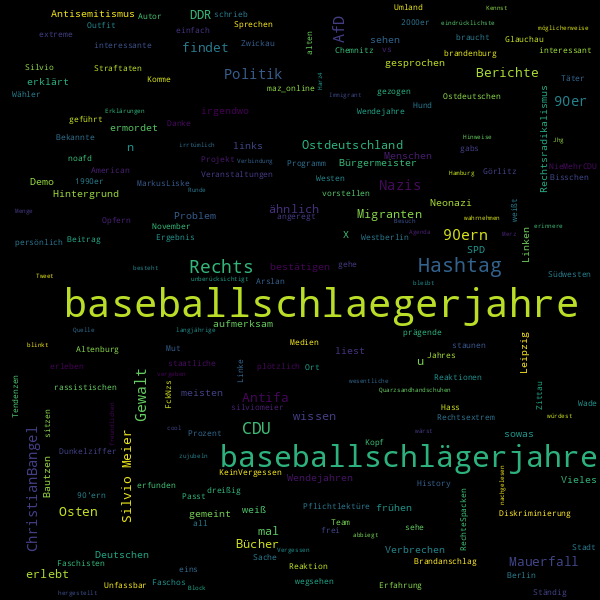

In [46]:
    Image('nmf-topic-1.png'.format(t))

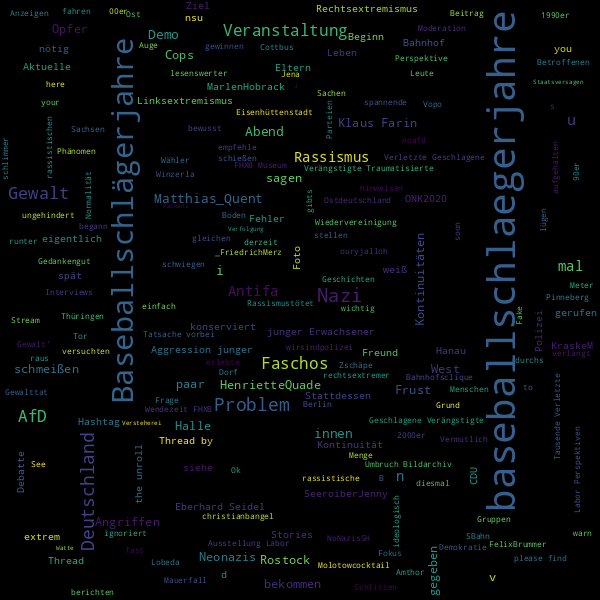

In [47]:
    Image('nmf-topic-2.png'.format(t))

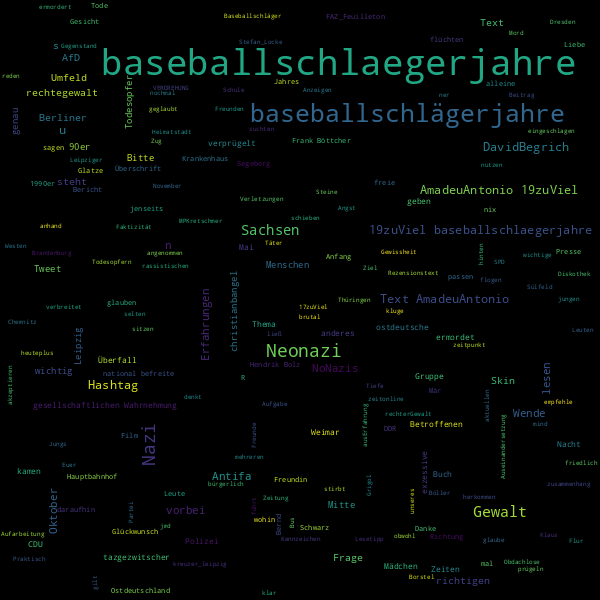

In [48]:
    Image('nmf-topic-3.png'.format(t))

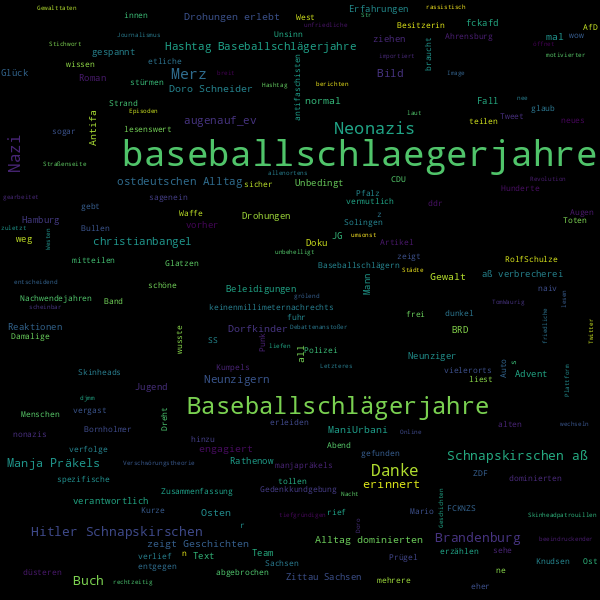

In [49]:
    Image('nmf-topic-4.png'.format(t))

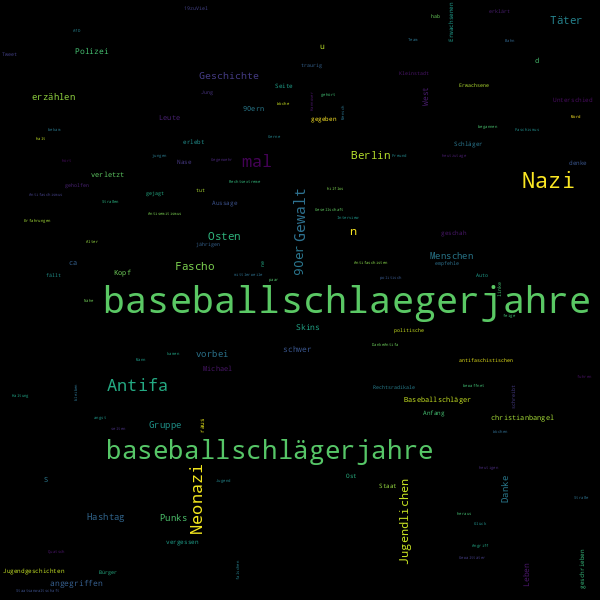

In [50]:
    Image('nmf-topic-5.png'.format(t))

In [51]:
for t in lsi_topics[5][:100]:
    print(t, '\n')

"Rechtsextremisten haben in Deutschland seit 1990 dutzendfach getötet. [...] Dazu kommen Tausende Verletzte, Geschlagene, Verängstigte, Traumatisierte." - 
@christianbangel
, #baseballschlägerjahre. 

Meine #baseballschlaegerjahre in #Brandenburg und #Berlin : Dankbarkeit für jeden #Antifa Aufkleber, der das Gefühl gab nicht allein zu sein. Dankbarkeit für jede proletarische Knüppelgarde, die ein Stück Sicherheit und Bewegubgsfreiheit gab. Danke #Antifa 

Meine Rede: Wessis tendieren immer noch dazu, den Kalten Krieg zu kämpfen.

Zeit, aufzuwachen, Leute. Es ist 2019 und wir erleben #baseballschlaegerjahre!

Siegt nur weiter gegen den Kommunismus - alte und neue Nazis danken es Euch.
@DIEZEIT
 @WSDOsten
 @christianbangel
 @NZZ
 @SZ 

danke, dass du deine Erfahrungen geteilt hast.

#FCKNZS #fckafd #baseballschlaegerjahre 

Seid ihr schon mit Rechten aneinandergeraten? Also nicht in den Kommentaren ? im echten Leben. Diese Erfahrungen haben Menschen hier geteilt 
 #baseballschlaegerjahre